In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_dataset=pd.read_csv('gld_price_data.csv')

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_dataset.shape

(2290, 6)

In [7]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation=gold_dataset.corr()

<AxesSubplot:>

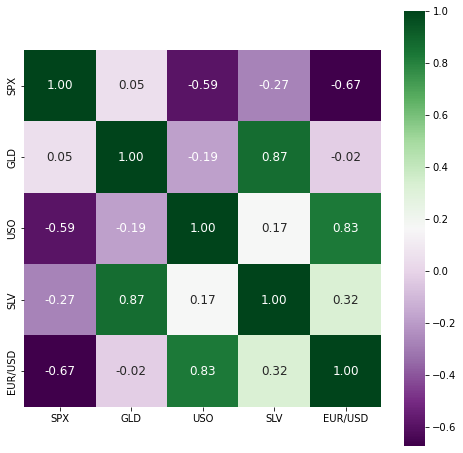

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':12},cmap='PRGn')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

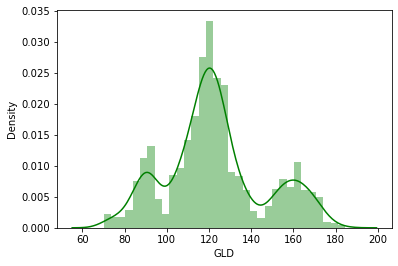

In [15]:
sns.distplot(gold_dataset['GLD'],color='green')

In [18]:
x=gold_dataset.drop(['Date','GLD'],axis=1)
y=gold_dataset['GLD']
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
model=RandomForestRegressor()

In [22]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
test_data_prediction=model.predict(x_test)
print(test_data_prediction)

[168.57369935  81.81339999 116.10890011 127.69870099 120.65200154
 154.82259766 150.28329859 126.16190065 117.58049884 125.84770087
 116.62370109 171.79710066 141.98699905 168.02819838 115.17739991
 117.43610043 140.76040253 170.01090003 159.90290321 157.01660005
 155.17260035 124.91870007 175.85319957 156.7809038  125.27440068
  93.94189985  77.50140013 120.44659995 119.08799946 167.58640025
  88.25320053 125.21600028  91.20020078 117.65600039 121.08669897
 136.10470055 115.50000111 115.51400075 146.38189986 106.97020105
 104.09390214  87.277898   126.5796009  117.70999965 153.79499927
 119.56750041 108.39900005 108.02379842  93.15320062 127.24189724
  75.41320018 113.61639915 121.29749996 111.41279924 118.90679903
 120.57389949 159.60420065 169.29560163 147.06769665  85.95509897
  94.2750003   86.9269989   90.57489982 119.01150059 126.39240086
 127.52070017 169.82560009 122.31429934 117.36869901  98.7031005
 168.63840212 143.05429831 132.38230205 121.10960226 120.94429966
 119.721900

In [24]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R score Error :",error_score)

R score Error : 0.9891298734221767


In [25]:
y_test=list(y_test)

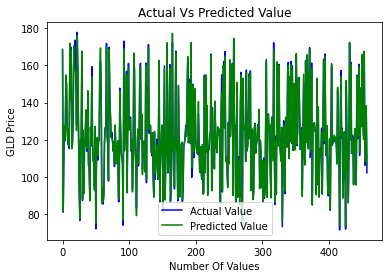

In [26]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label="Predicted Value")
plt.title('Actual Vs Predicted Value')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()